In [ ]:
import pandas as pd
df = pd.read_csv("car.data")

In [ ]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
col_names = ['buying' , 'maint' , 'doors' , 'persons' , 'lug_boot' , 'safety' , 'class']


In [ ]:
df.columns = col_names

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe(include = 'all')

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
for col in col_names:
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1722,False
1723,False
1724,False
1725,False


In [ ]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['doors'] = oe.fit_transform(df[['doors']])
df['persons'] = oe.fit_transform(df[['persons']])
df['lug_boot'] = oe.fit_transform(df[['lug_boot']])
df['safety'] = oe.fit_transform(df[['safety']])
df['class'] = oe.fit_transform(df[['class']])

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [ ]:
X = df.iloc[: ,0:-1]
y = df.iloc[: ,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 0 )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
pred1 = clf1.predict(X_test)
pred1

array([0., 2., 2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 0., 2., 0., 0., 2.,
       2., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       1., 0., 2., 2., 2., 2., 0., 2., 0., 2., 2., 2., 0., 0., 2., 0., 0.,
       0., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 3., 2., 0., 2., 2., 0., 0., 0., 2., 0.,
       0., 2., 3., 2., 2., 2., 2., 2., 2., 2., 3., 0., 0., 2., 2., 2., 2.,
       2., 2., 3., 0., 2., 2., 0., 2., 2., 2., 2., 3., 2., 1., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 3., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 3., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1., 2., 2., 0., 2., 2., 0.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 0., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2.

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred1 , y_test))

0.9739884393063584


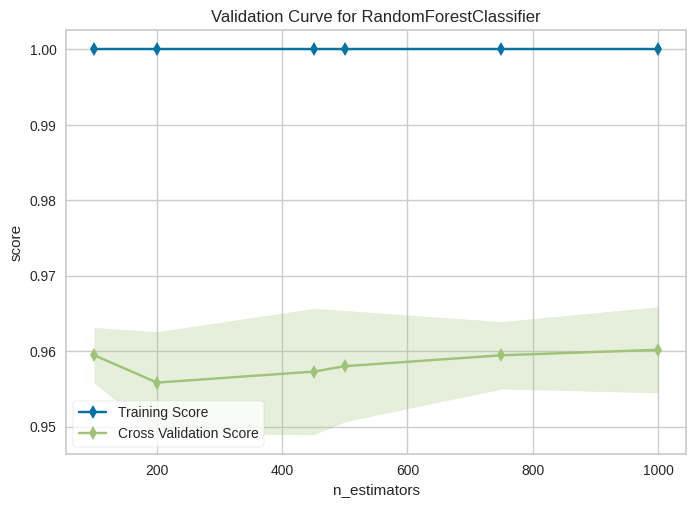

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [ ]:
from yellowbrick.model_selection import validation_curve

num_est = [100 , 200 , 450 , 500 , 750 , 1000]
print(validation_curve(RandomForestClassifier() , X = X_train , y= y_train , param_name = 'n_estimators' , param_range = num_est , scoring = 'accuracy' , cv = 3))

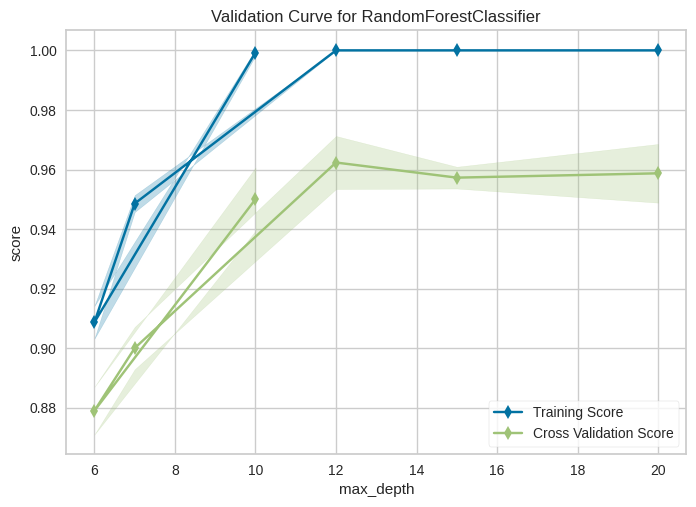

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  6,  7, 12, 15, 20]),
                scoring='accuracy')


In [ ]:
from yellowbrick.model_selection import validation_curve

depth_vals = [10 , 6 , 7 , 12 , 15 , 20]
print(validation_curve(RandomForestClassifier() , X = X_train , y= y_train , param_name = 'max_depth' , param_range = depth_vals , scoring = 'accuracy' , cv = 3))

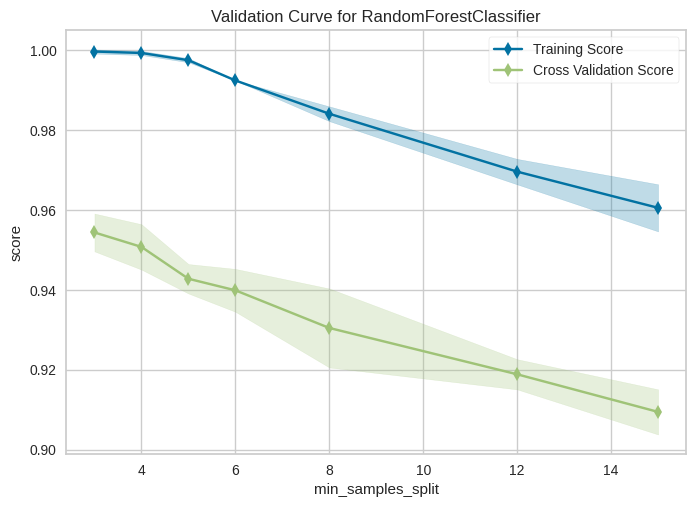

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  4,  5,  6,  8, 12, 15]),
                scoring='accuracy')


In [ ]:
from yellowbrick.model_selection import validation_curve

min_samples = [3 , 4 , 5 , 6 , 8 , 12 , 15]
print(validation_curve(RandomForestClassifier() , X = X_train , y= y_train , param_name = 'min_samples_split' , param_range = min_samples , scoring = 'accuracy' , cv = 3))

In [ ]:
clf2 = RandomForestClassifier(n_estimators = 1000 , min_samples_split = 3 , max_depth = 12 , random_state = 0)
clf2.fit(X_train , y_train)

RandomForestClassifier(max_depth=12, min_samples_split=3, n_estimators=1000,
                       random_state=0)

In [ ]:
pred2 = clf2.predict(X_test)
print(accuracy_score(pred2 , y_test))

0.9739884393063584


In [ ]:
feature_scores = pd.Series(clf2.feature_importances_ , index = X_train.columns).sort_values(ascending = False)
print(feature_scores)

safety      0.286025
persons     0.240257
buying      0.178950
maint       0.148146
lug_boot    0.084749
doors       0.061873
dtype: float64


Text(0.5, 0, 'Feature Importance Score')

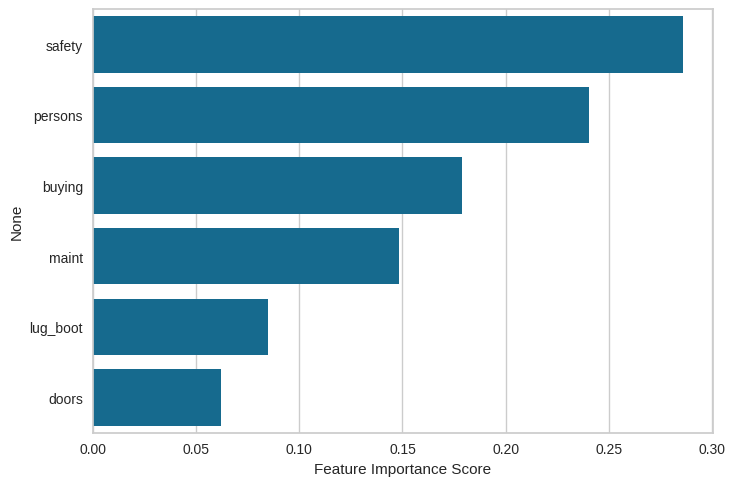

In [ ]:
sns.barplot(x = feature_scores , y = feature_scores.index )
plt.xlabel('Feature Importance Score')

In [ ]:
clf3 = RandomForestClassifier()

Xn = df.drop(['doors' , 'lug_boot' , 'maint'] , axis = 1)
yn = df['class']

X_trainn , X_testn , y_trainn , y_testn = train_test_split(Xn , yn , test_size = 0.3)


In [ ]:
clf3.fit(X_trainn , y_trainn)
pred3 = clf3.predict(X_testn)
print(accuracy_score(pred3 , y_testn))

1.0


In [ ]:
clf4 = RandomForestClassifier(n_estimators = 1000 , min_samples_split = 3 , max_depth = 12 , random_state = 0)
clf4.fit(X_trainn , y_trainn)

pred4 = clf4.predict(X_testn)
print(accuracy_score(pred4 , y_testn))

1.0
